# Environment test

## 1. Verify data science/ML libraries

Check that TensorFlow and PyTorch are importable and are the correct versions

In [1]:
import tensorflow as tf
import torch

print('TensorFlow version:', tf.__version__)
print('PyTorch version:', torch.__version__)

TensorFlow version: 2.16.1
PyTorch version: 2.10.0+cu126


Check that GPU(s) are correctly detected and available for both frameworks

In [2]:
# TensorFlow GPU detection
print('TensorFlow GPUs:', tf.config.list_physical_devices('GPU'))

# PyTorch GPU detection
print(f'PyTorch CUDA available: {torch.cuda.is_available()}')
print(f'PyTorch CUDA device count: {torch.cuda.device_count()}')

if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f'  GPU {i}: {torch.cuda.get_device_name(i)}')

TensorFlow GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
PyTorch CUDA available: True
PyTorch CUDA device count: 2
  GPU 0: Tesla P100-PCIE-16GB
  GPU 1: NVIDIA GeForce GTX 1070


Check other data science libraries:

In [3]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk

print('Matplotlib version:', mpl.__version__)
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Scikit-learn version:', sk.__version__)
print('SciPy version:', sp.__version__)

Matplotlib version: 3.10.8
NumPy version: 1.24.4
Pandas version: 2.2.1
Scikit-learn version: 1.4.2
SciPy version: 1.13.1


## 2. GPU load test

In [4]:
# GPU load test - Matrix multiplication with memory scaling
from functions.gpu_load_test import run_gpu_load_test

target_memory_percent = 75.0
test_duration_seconds = 10 * 60

gpu_results = run_gpu_load_test(target_memory_percent, test_duration_seconds)

Memory growth enabled for 2 GPU(s)
Testing GPU 0: /physical_device:GPU:0
Total GPU memory: 16384 MB
Initial memory used: 2084 MB (12.7%)
Target: 75.0% memory usage

Trying matrix size: 1000x1000... Memory: 2382 MB (14.5%)
Trying matrix size: 2000x2000... Memory: 2478 MB (15.1%)
Trying matrix size: 3000x3000... Memory: 2862 MB (17.5%)
Trying matrix size: 4000x4000... Memory: 2862 MB (17.5%)
Trying matrix size: 5000x5000... Memory: 3374 MB (20.6%)
Trying matrix size: 6000x6000... Memory: 4398 MB (26.8%)
Trying matrix size: 7000x7000... Memory: 4398 MB (26.8%)
Trying matrix size: 8000x8000... Memory: 4398 MB (26.8%)
Trying matrix size: 9000x9000... Memory: 6446 MB (39.3%)
Trying matrix size: 10000x10000... Memory: 6446 MB (39.3%)
Trying matrix size: 11000x11000... Memory: 6446 MB (39.3%)
Trying matrix size: 12000x12000... Memory: 10542 MB (64.3%)
Trying matrix size: 13000x13000... Memory: 10542 MB (64.3%)
Trying matrix size: 14000x14000... Memory: 10542 MB (64.3%)
Trying matrix size: 1500

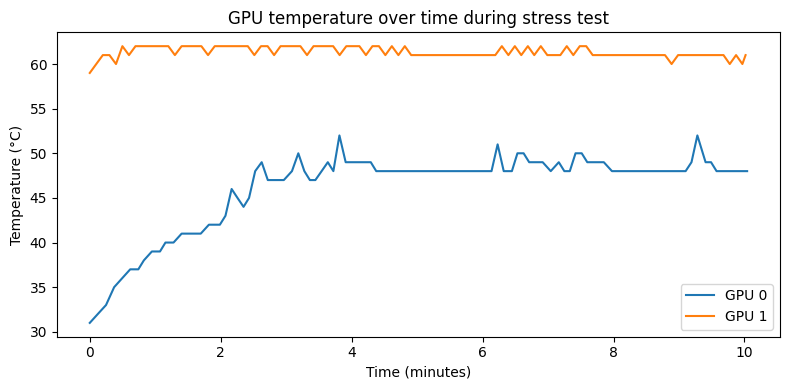

In [5]:
# Plot temperature over time for each GPU
from functions.gpu_load_test import plot_temperature_results

plot_temperature_results(gpu_results)

## 3. PyTorch GPU load test

In [6]:
# PyTorch GPU load test - Matrix multiplication with memory scaling
from functions.pytorch_gpu_load_test import run_pytorch_gpu_load_test

target_memory_percent = 75.0
test_duration_seconds = 10 * 60

pytorch_gpu_results = run_pytorch_gpu_load_test(target_memory_percent, test_duration_seconds)

Found 2 CUDA GPU(s)
  GPU 0: Tesla P100-PCIE-16GB
  GPU 1: NVIDIA GeForce GTX 1070
Testing GPU 0: Tesla P100-PCIE-16GB
Total GPU memory: 16384 MB
Initial memory used: 15568 MB (95.0%)
Target: 75.0% memory usage

Trying matrix size: 1000x1000... Memory: 15596 MB (95.2%)

Reached 95.2% memory usage with 1000x1000 matrices

Running stress test for 10 minutes at 1000x1000...
Initial temperature: 26°C
  30s elapsed, 570s remaining - Temp: 42°C, Iterations: 79234
  60s elapsed, 540s remaining - Temp: 49°C, Iterations: 158582
  90s elapsed, 510s remaining - Temp: 54°C, Iterations: 238324
  120s elapsed, 480s remaining - Temp: 57°C, Iterations: 315192
  150s elapsed, 450s remaining - Temp: 59°C, Iterations: 373492
  180s elapsed, 420s remaining - Temp: 62°C, Iterations: 446287
  210s elapsed, 390s remaining - Temp: 64°C, Iterations: 515087
  240s elapsed, 360s remaining - Temp: 67°C, Iterations: 595068
  270s elapsed, 330s remaining - Temp: 68°C, Iterations: 675018
  300s elapsed, 300s remaini

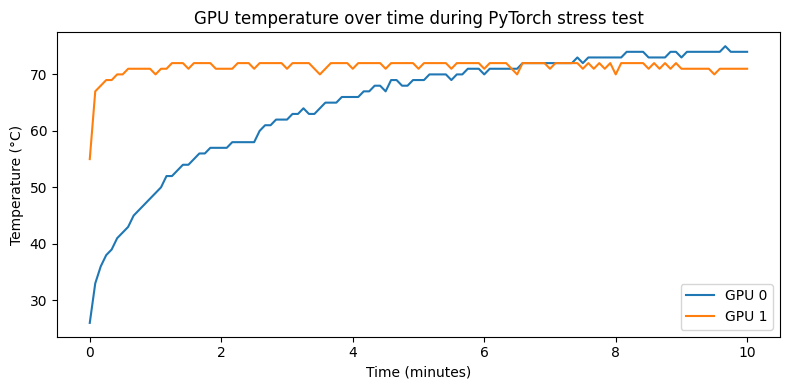

In [7]:
# Plot temperature over time for each GPU
from functions.pytorch_gpu_load_test import plot_temperature_results

plot_temperature_results(pytorch_gpu_results)